In [2]:
# To import neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as math
import seaborn as sns

In [3]:
# To import dataset
data = pd.read_csv('Retail.csv')

In [4]:
data.head()

,OrderNumber,ProductName,Color,Category,Subcategory,ListPrice,Orderdate,Duedate,Shipdate,PromotionName,SalesRegion,OrderQuantity,UnitPrice,SalesAmount,DiscountAmount,TaxAmount,Freight
0,SO43843,"Mountain-100 Silver, 48",Silver,Bikes,Mountain Bikes,3399.9900,1/29/2011,2/10/2011,2/5/2011,No Discount,Central,2,2039.9940,4079.9880,0.0,326.3990,101.9997
1,SO43843,"Mountain-100 Black, 48",Black,Bikes,Mountain Bikes,3374.9900,1/29/2011,2/10/2011,2/5/2011,No Discount,Central,2,2024.9940,4049.9880,0.0,323.9990,101.2497
2,SO43843,"HL Mountain Frame - Silver, 46",Silver,Components,Mountain Frames,1204.3248,1/29/2011,2/10/2011,2/5/2011,No Discount,Central,2,722.5949,1445.1898,0.0,115.6152,36.1297
3,SO43843,"Mountain-100 Black, 44",Black,Bikes,Mountain Bikes,NaN,1/29/2011,2/10/2011,2/5/2011,No Discount,Central,5,2024.9940,10124.9700,0.0,809.9976,253.1243
4,SO43843,"HL Mountain Frame - Silver, 38",Silver,Components,Mountain Frames,1204.3248,1/29/2011,2/10/2011,2/5/2011,No Discount,Central,2,722.5949,1445.1898,0.0,115.6152,36.1297


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32040 entries, 0 to 32039
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OrderNumber     32040 non-null  object 
 1   ProductName     32040 non-null  object 
 2   Color           29073 non-null  object 
 3   Category        32040 non-null  object 
 4   Subcategory     32040 non-null  object 
 5   ListPrice       32032 non-null  float64
 6   Orderdate       32040 non-null  object 
 7   Duedate         32040 non-null  object 
 8   Shipdate        32040 non-null  object 
 9   PromotionName   32040 non-null  object 
 10  SalesRegion     32025 non-null  object 
 11  OrderQuantity   32026 non-null  object 
 12  UnitPrice       32040 non-null  float64
 13  SalesAmount     32040 non-null  float64
 14  DiscountAmount  32040 non-null  float64
 15  TaxAmount       32040 non-null  float64
 16  Freight         32040 non-null  float64
dtypes: float64(6), object(11)
memor

In [6]:
# to check null values
data.isnull().sum()

OrderNumber          0
ProductName          0
Color             2967
Category             0
Subcategory          0
ListPrice            8
Orderdate            0
Duedate              0
Shipdate             0
PromotionName        0
SalesRegion         15
OrderQuantity       14
UnitPrice            0
SalesAmount          0
DiscountAmount       0
TaxAmount            0
Freight              0
dtype: int64

In [7]:
# for changing dates
data[["Orderdate", "Duedate", "Shipdate"]] = data[["Orderdate", "Duedate", "Shipdate"]].apply(pd.to_datetime)
data.dtypes


OrderNumber               object
ProductName               object
Color                     object
Category                  object
Subcategory               object
ListPrice                float64
Orderdate         datetime64[ns]
Duedate           datetime64[ns]
Shipdate          datetime64[ns]
PromotionName             object
SalesRegion               object
OrderQuantity             object
UnitPrice                float64
SalesAmount              float64
DiscountAmount           float64
TaxAmount                float64
Freight                  float64
dtype: object

In [8]:
# for order quantity
data['OrderQuantity'].fillna(1, inplace=True)
data.isnull().sum()

OrderNumber          0
ProductName          0
Color             2967
Category             0
Subcategory          0
ListPrice            8
Orderdate            0
Duedate              0
Shipdate             0
PromotionName        0
SalesRegion         15
OrderQuantity        0
UnitPrice            0
SalesAmount          0
DiscountAmount       0
TaxAmount            0
Freight              0
dtype: int64

In [9]:
# For list price
data['ListPrice'] = data['ListPrice'].fillna(data['ListPrice'].mean())

In [10]:
data.isnull().sum()

OrderNumber          0
ProductName          0
Color             2967
Category             0
Subcategory          0
ListPrice            0
Orderdate            0
Duedate              0
Shipdate             0
PromotionName        0
SalesRegion         15
OrderQuantity        0
UnitPrice            0
SalesAmount          0
DiscountAmount       0
TaxAmount            0
Freight              0
dtype: int64

In [11]:
# For SalesRegion 
data = data[data['SalesRegion'].notna()]

In [12]:
# For noise
data.loc[data['Orderdate'] > data['Duedate'] , 'DueData'] = 'OrderDate'

In [17]:
#For color column
data['Color'].fillna(data['Color'].mode()[0],inplace=True)

In [18]:
data.isnull().sum()

OrderNumber       0
ProductName       0
Color             0
Category          0
Subcategory       0
ListPrice         0
Orderdate         0
Duedate           0
Shipdate          0
PromotionName     0
SalesRegion       0
OrderQuantity     0
UnitPrice         0
SalesAmount       0
DiscountAmount    0
TaxAmount         0
Freight           0
DueData           0
dtype: int64

In [19]:

#removing outliers from data:
print(data['SalesAmount'].mean(), data['SalesAmount'].std(), data['SalesAmount'].mean() - 3 * data['SalesAmount'].std(), data['SalesAmount'].mean() + 3 * data['SalesAmount'].std())
data = data[data['SalesAmount'] < (data['SalesAmount'].mean() + (3 * data['SalesAmount'].std()))] 
data = data[data['SalesAmount'] > (data['SalesAmount'].mean() - (3 * data['SalesAmount'].std()))]

1298.8642341233412 2153.1819107753727 -5160.681498202777 7758.409966449459


<Axes: xlabel='Category', ylabel='ListPrice'>

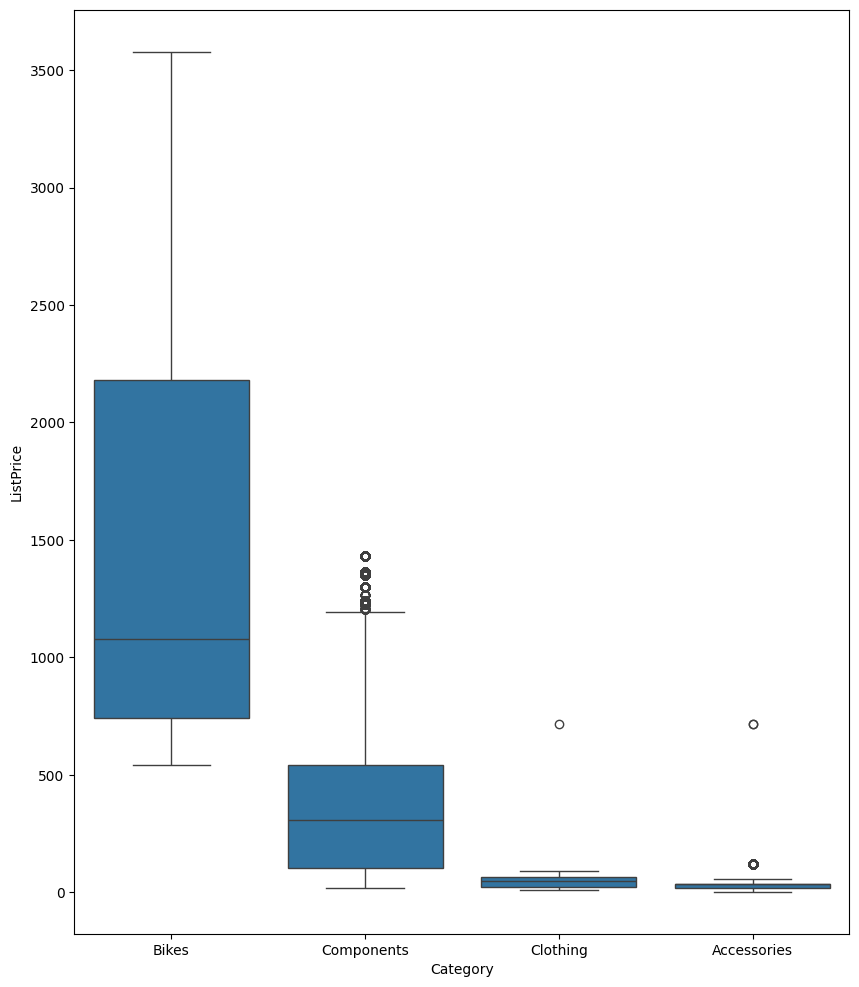

In [21]:
plt.figure(figsize =(10, 12)) 
sns.boxplot(y= data['ListPrice'], x = data['Category'])

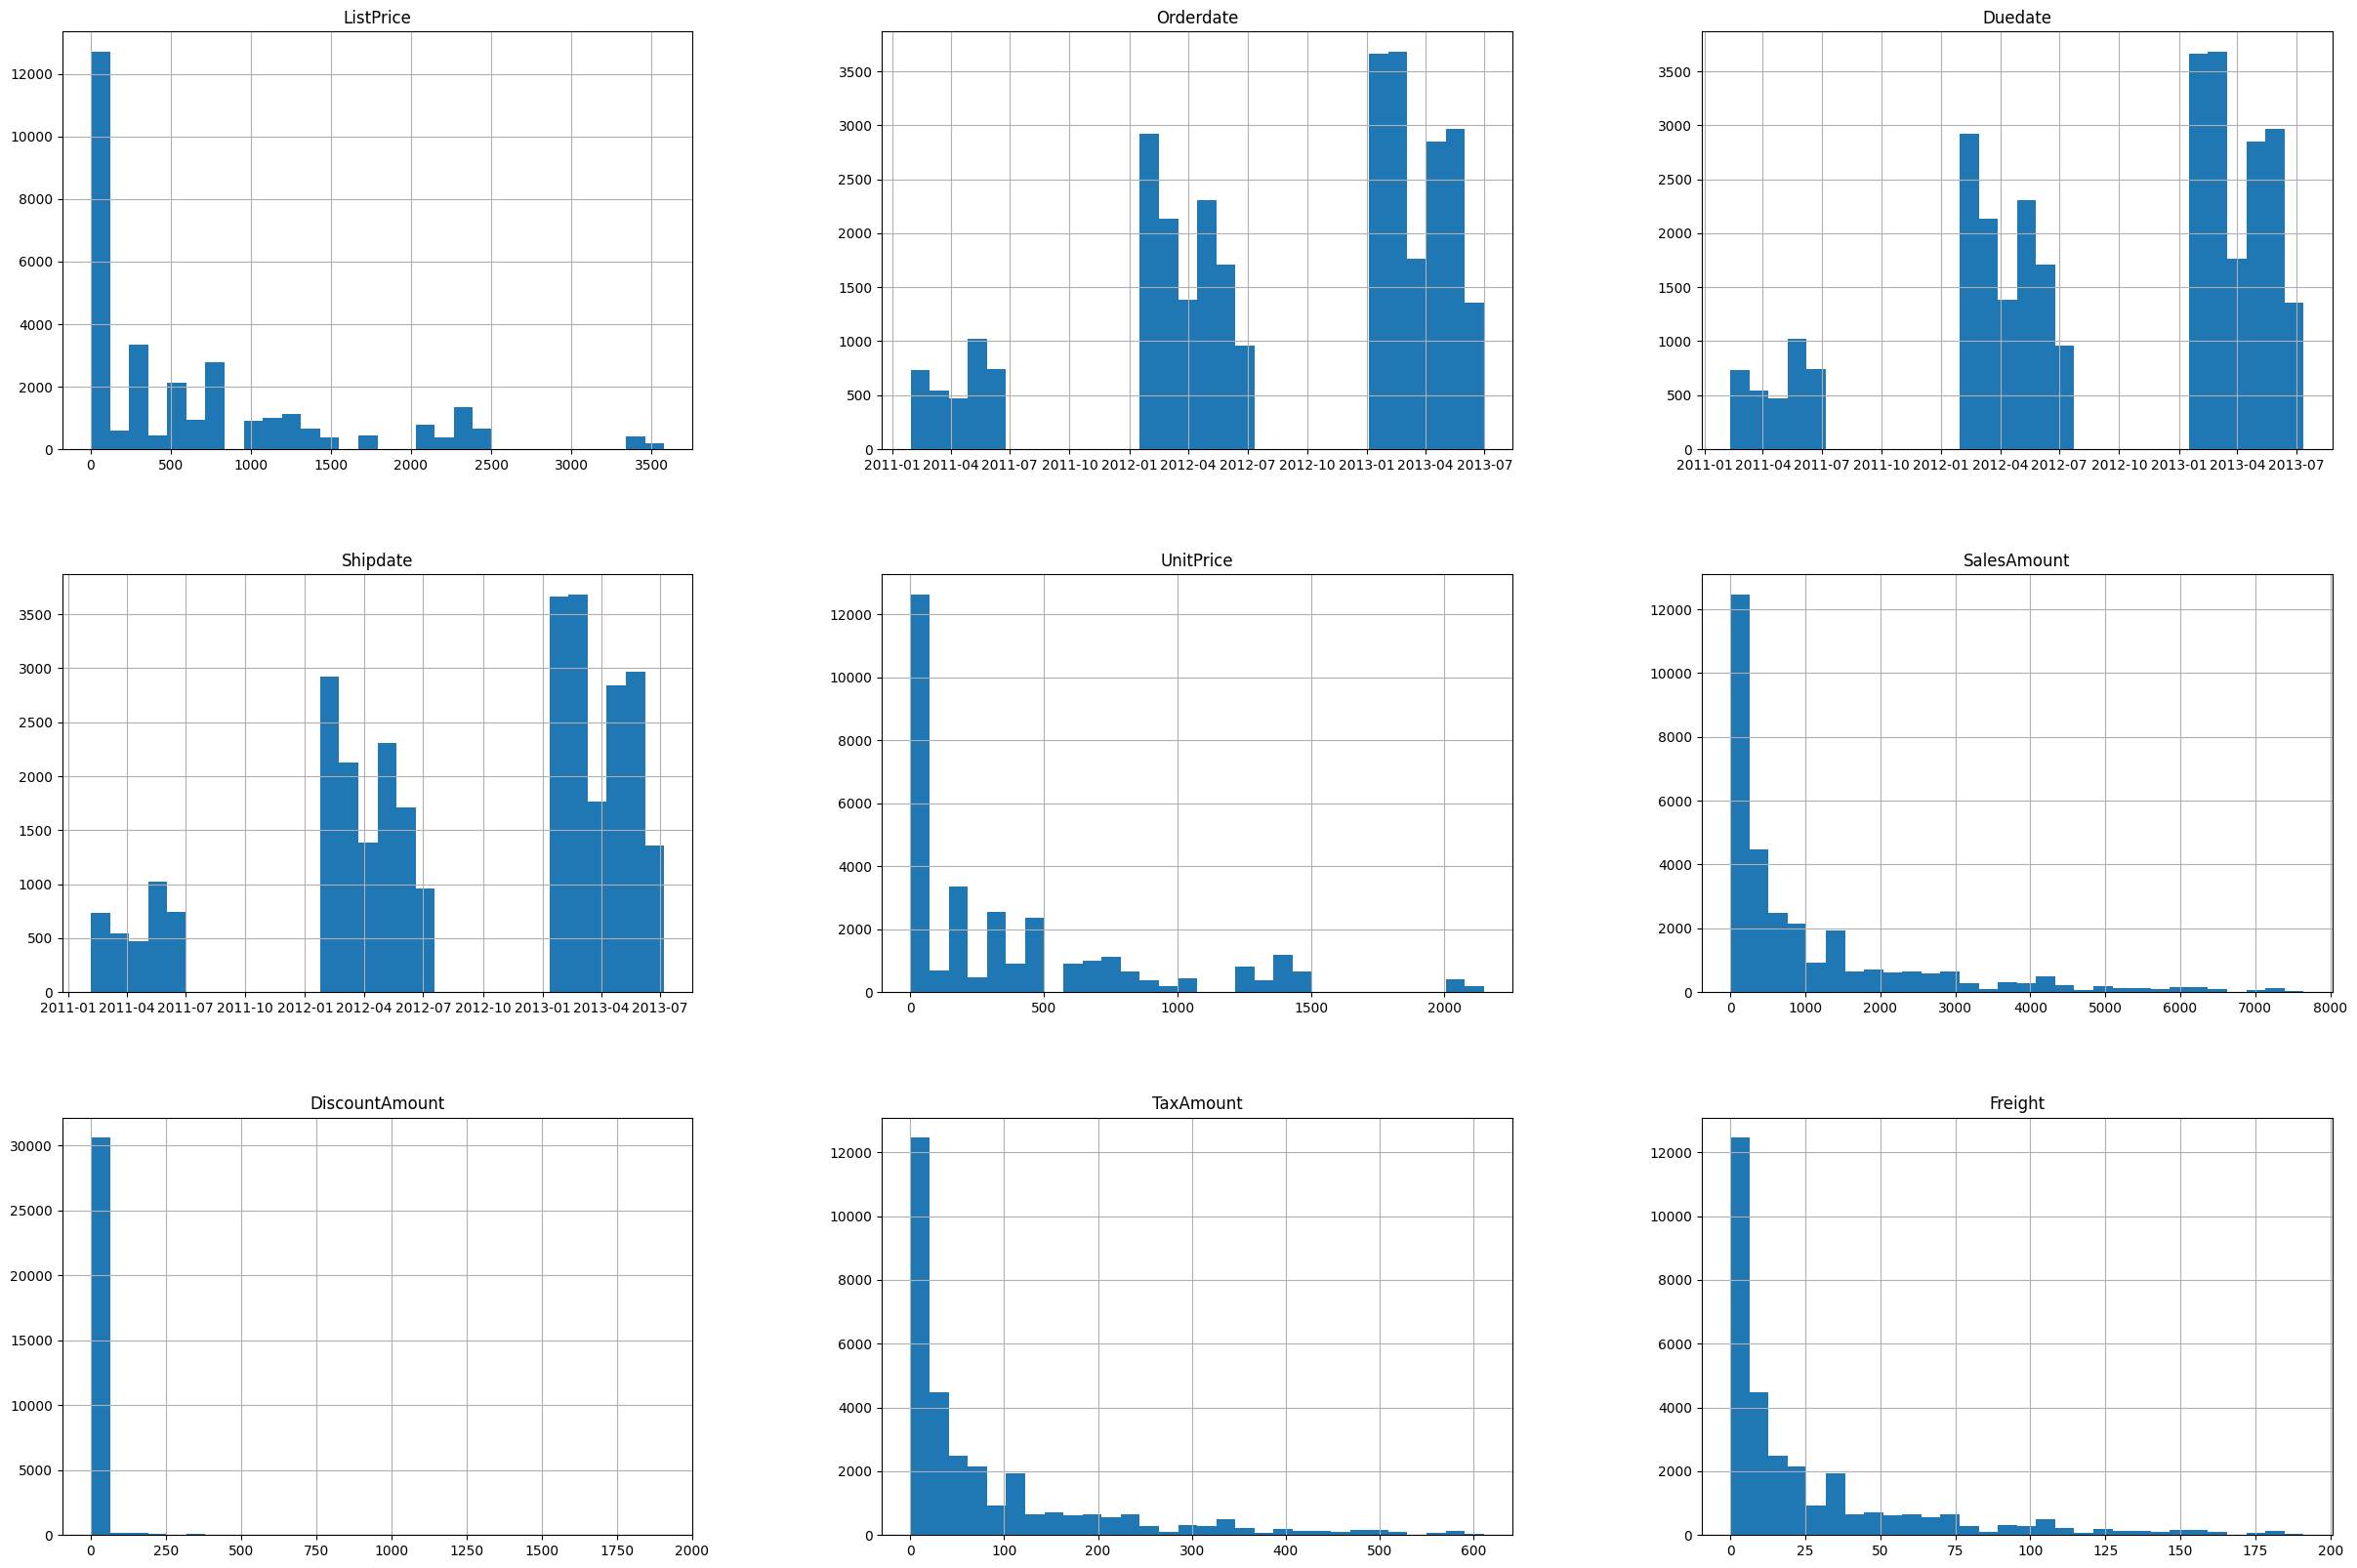

In [27]:
# Plot the histograms of each 
data.hist(bins=30, figsize=(30,20))
plt.show()

In [33]:
#z-score normalization
data['NormalizedPrice'] = data.iloc[:,5:6].apply(lambda x: (x-x.mean())/ x.std(), axis=0)
data.head(20)

,OrderNumber,ProductName,Color,Category,Subcategory,ListPrice,Orderdate,Duedate,Shipdate,PromotionName,SalesRegion,OrderQuantity,UnitPrice,SalesAmount,DiscountAmount,TaxAmount,Freight,DueData,NormalizedPrice
0,SO43843,"Mountain-100 Silver, 48",Silver,Bikes,Mountain Bikes,3399.9900,2011-01-29,2011-02-10,2011-02-05,No Discount,Central,2,2039.9940,4079.9880,0.0,326.3990,101.9997,nan,3.409295
1,SO43843,"Mountain-100 Black, 48",Black,Bikes,Mountain Bikes,3374.9900,2011-01-29,2011-02-10,2011-02-05,No Discount,Central,2,2024.9940,4049.9880,0.0,323.9990,101.2497,nan,3.378107
2,SO43843,"HL Mountain Frame - Silver, 46",Silver,Components,Mountain Frames,1204.3248,2011-01-29,2011-02-10,2011-02-05,No Discount,Central,2,722.5949,1445.1898,0.0,115.6152,36.1297,nan,0.670126
4,SO43843,"HL Mountain Frame - Silver, 38",Silver,Components,Mountain Frames,1204.3248,2011-01-29,2011-02-10,2011-02-05,No Discount,Central,2,722.5949,1445.1898,0.0,115.6152,36.1297,nan,0.670126
5,SO43843,"HL Mountain Frame - Silver, 48",Silver,Components,Mountain Frames,1364.5000,2011-01-29,2011-02-10,2011-02-05,No Discount,Central,1,818.7000,818.7000,0.0,65.4960,20.4675,nan,0.869950
6,SO43843,"HL Mountain Frame - Black, 48",Black,Components,Mountain Frames,1349.6000,2011-01-29,2011-02-10,2011-02-05,No Discount,Central,Nan,809.7600,809.7600,0.0,64.7808,20.2440,nan,0.851362
7,SO43843,"Mountain-100 Silver, 38",Silver,Bikes,Mountain Bikes,3399.9900,2011-01-29,2011-02-10,2011-02-05,No Discount,Central,2,2039.9940,4079.9880,0.0,326.3990,101.9997,nan,3.409295
8,SO43843,"Mountain Bike Socks, M",White,Clothing,Socks,9.5000,2011-01-29,2011-02-10,2011-02-05,No Discount,Central,2,5.7000,11.4000,0.0,0.9120,0.2850,nan,-0.820460
9,SO43843,"Mountain-100 Black, 42",Black,Bikes,Mountain Bikes,3374.9900,2011-01-29,2011-02-10,2011-02-05,No Discount,Central,3,2024.9940,6074.9820,0.0,485.9986,151.8746,nan,3.378107
14,SO43845,"LL Road Frame - Red, 44",Red,Components,Road Frames,306.5636,2011-01-29,2011-02-10,2011-02-05,No Discount,Southeast,1,183.9382,183.9382,0.0,14.7151,4.5985,nan,-0.449863


(array([13046.,  3629.,   462.,  3451.,  2353.,   906.,  1888.,   910.,
          552.,   443.,     0.,   798.,   959.,  1251.,     0.,     0.,
            0.,     0.,   199.,   386.]),
 array([1.32820000e+00, 1.08609890e+02, 2.15891580e+02, 3.23173270e+02,
        4.30454960e+02, 5.37736650e+02, 6.45018340e+02, 7.52300030e+02,
        8.59581720e+02, 9.66863410e+02, 1.07414510e+03, 1.18142679e+03,
        1.28870848e+03, 1.39599017e+03, 1.50327186e+03, 1.61055355e+03,
        1.71783524e+03, 1.82511693e+03, 1.93239862e+03, 2.03968031e+03,
        2.14696200e+03]),
 <BarContainer object of 20 artists>)

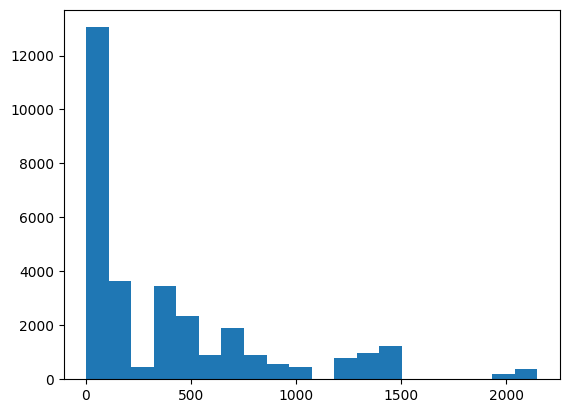

In [41]:
plt.hist(data.UnitPrice, bins=20)